In [2]:
from dateutil.parser import parse

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 5


In [3]:
pd.to_datetime('2018-5-15 3:45pm')

Timestamp('2018-05-15 15:45:00')

In [4]:
pd.to_datetime('7/8/2018')

Timestamp('2018-07-08 00:00:00')

In [5]:
pd.to_datetime('7/8/1952',dayfirst = True)

Timestamp('1952-08-07 00:00:00')

In [6]:
pd.to_datetime(['2018-01-05','7/8/1952','Oct 10, 1995'])

DatetimeIndex(['2018-01-05', '1952-07-08', '1995-10-10'], dtype='datetime64[ns]', freq=None)

In [7]:
pd.to_datetime(['2/25/10','8/6/17','12/15/12'],format='%m/%d/%y')

DatetimeIndex(['2010-02-25', '2017-08-06', '2012-12-15'], dtype='datetime64[ns]', freq=None)

In [8]:
opsd_daily = pd.read_csv('datasets/opsd_germany_daily.csv')
opsd_daily.shape

(4383, 5)

In [9]:
opsd_daily.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [10]:
opsd_daily.dtypes

Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

In [11]:
format = '%Y-%m-%d'

opsd_daily['Date'] = pd.to_datetime(opsd_daily['Date'],format=format)

opsd_daily.set_index('Date',inplace=True)
opsd_daily.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN


In [12]:
opsd_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  4383 non-null   float64
 1   Wind         2920 non-null   float64
 2   Solar        2188 non-null   float64
 3   Wind+Solar   2187 non-null   float64
dtypes: float64(4)
memory usage: 171.2 KB


In [13]:
pd.DatetimeIndex(opsd_daily.index).year

Int64Index([2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='Date', length=4383)

In [14]:
pd.DatetimeIndex(opsd_daily.index).week

Int64Index([52,  1,  1,  1,  1,  1,  1,  1,  2,  2,
            ...
            51, 51, 51, 52, 52, 52, 52, 52, 52, 52],
           dtype='int64', name='Date', length=4383)

In [15]:
opsd_daily['Year'] = pd.DatetimeIndex(opsd_daily.index).year
opsd_daily['Month'] = pd.DatetimeIndex(opsd_daily.index).month
#opsd_daily['WeekdayName'] = pd.DatetimeIndex(opsd_daily.index).weekday_name

opsd_daily.sample(5, random_state =0)

,Consumption,Wind,Solar,Wind+Solar,Year,Month
Date,,,,,,
2008-08-23,1152.011,NaN,NaN,NaN,2008,8
2013-08-08,1291.984,79.666,93.371,173.037,2013,8
2009-08-27,1281.057,NaN,NaN,NaN,2009,8
2015-10-02,1391.050,81.229,160.641,241.870,2015,10
2009-06-02,1201.522,NaN,NaN,NaN,2009,6


In [16]:
opsd_daily['WeekdayName'] = (opsd_daily.index).weekday_name

AttributeError: 'DatetimeIndex' object has no attribute 'weekday_name'

In [17]:
opsd_daily.loc['2017-08-10']

Consumption    1351.491
Wind            100.274
Solar            71.160
Wind+Solar      171.434
Year           2017.000
Month             8.000
Name: 2017-08-10 00:00:00, dtype: float64

In [18]:
opsd_daily.loc['2014-01-20':'2014-01-25']

,Consumption,Wind,Solar,Wind+Solar,Year,Month
Date,,,,,,
2014-01-20,1590.687,78.647,6.371,85.018,2014,1
2014-01-21,1624.806,15.643,5.835,21.478,2014,1
2014-01-22,1625.155,60.259,11.992,72.251,2014,1
2014-01-23,1631.373,125.177,13.661,138.838,2014,1
2014-01-24,1617.411,106.527,9.807,116.334,2014,1
2014-01-25,1399.124,145.786,19.051,164.837,2014,1


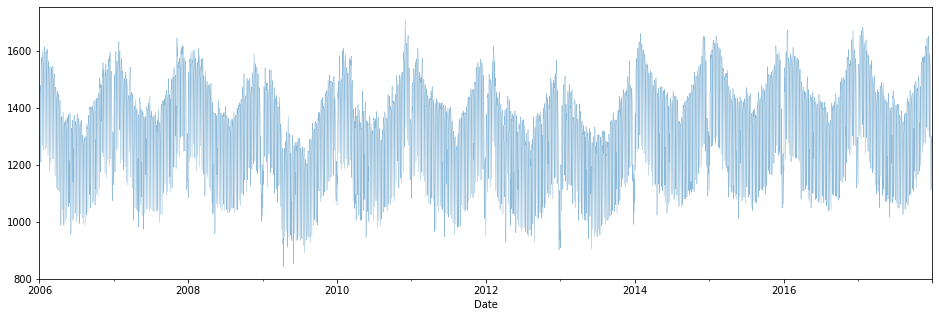

In [19]:
#Visualizing time Series Data
plt.figure(figsize=(16, 5))
opsd_daily['Consumption'].plot(linewidth=0.5,alpha=.5);

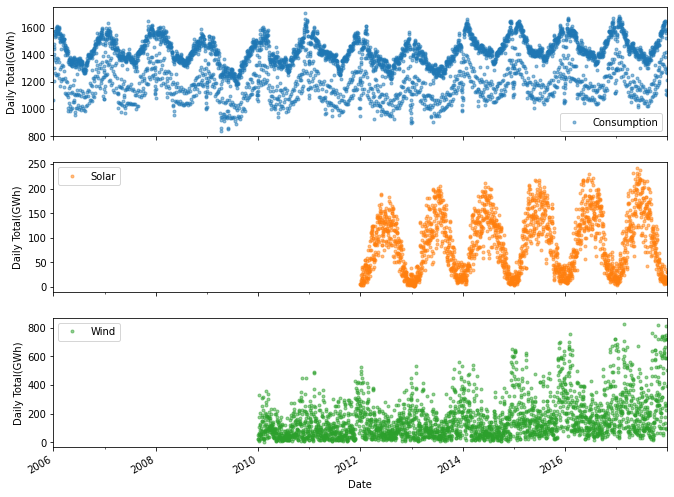

In [20]:
cols_plot = ['Consumption','Solar','Wind']

axes = opsd_daily[cols_plot].plot(marker ='.',
                                 alpha=0.5,
                                 linestyle = 'None',
                                 figsize=(11, 9),
                                 subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Total(GWh)')

Text(0, 0.5, 'Daily Consumption (GWh)')

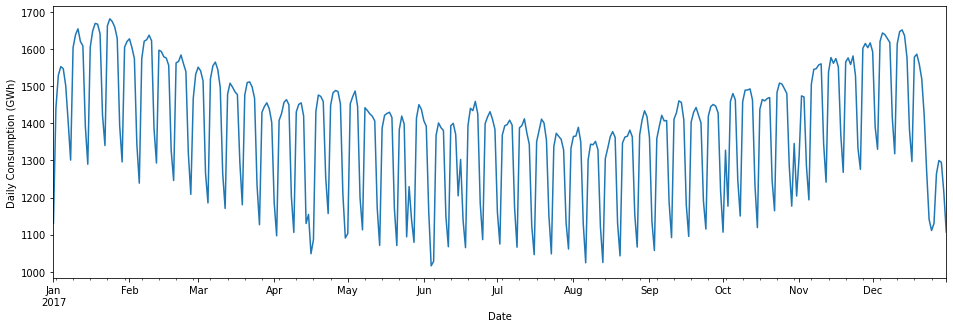

In [21]:
plt.figure(figsize=(16, 5))
ax = opsd_daily.loc['2017' :, 'Consumption'].plot()
ax.set_ylabel("Daily Consumption (GWh)")

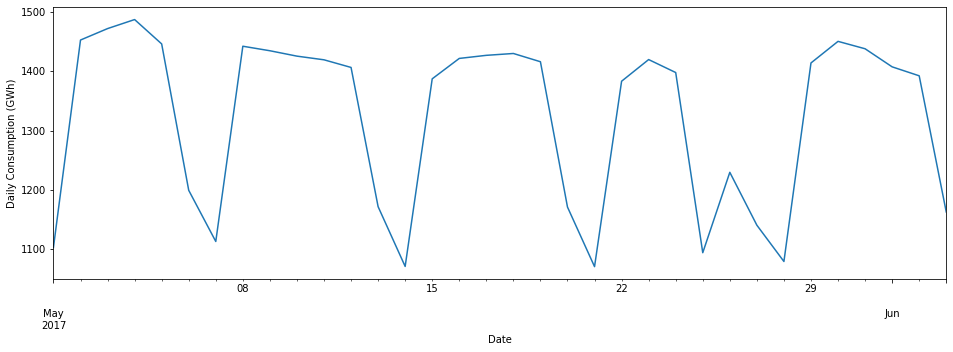

In [22]:
plt.figure(figsize=(16, 5))
ax = opsd_daily.loc['2017-05-01':'2017-06-03','Consumption'].plot()
ax.set_ylabel('Daily Consumption (GWh)');

Text(0, 0.5, 'Daily Consumption(GWh)')

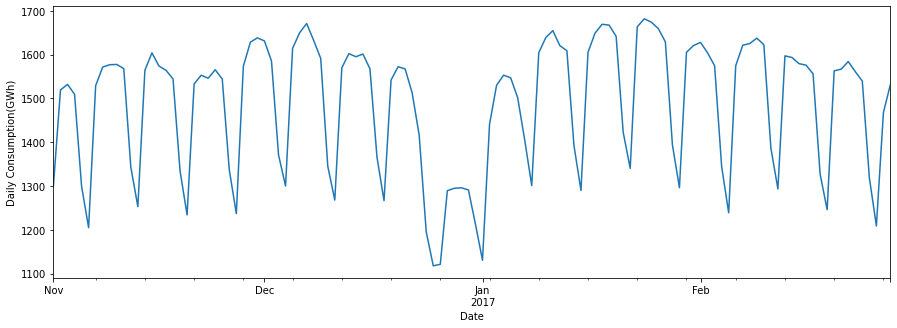

In [23]:
ax = opsd_daily.loc['2016-11-01':'2017-02-28','Consumption'].plot()
ax.set_ylabel('Daily Consumption(GWh)')

Text(0, 0.5, 'Daily Consuption(GWh)')

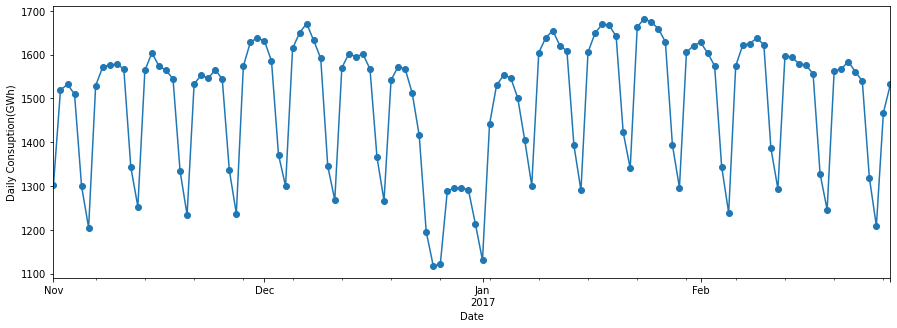

In [24]:
ax = opsd_daily.loc['2016-11-01':'2017-02-28','Consumption'].plot(marker='o',linestyle='-')
ax.set_ylabel('Daily Consuption(GWh)')

In [25]:
import matplotlib.dates as mdates

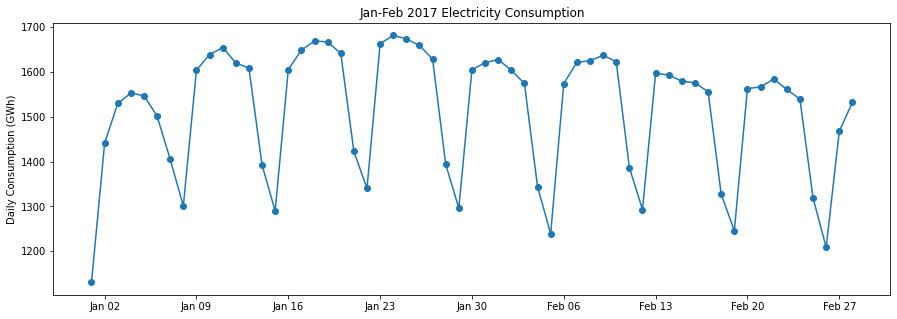

In [26]:
fig, ax = plt.subplots()

ax.plot(opsd_daily.loc['2017-01-01':'2017-02-28','Consumption'],marker='o',linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)')
ax.set_title('Jan-Feb 2017 Electricity Consumption')

ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

## Seasonality

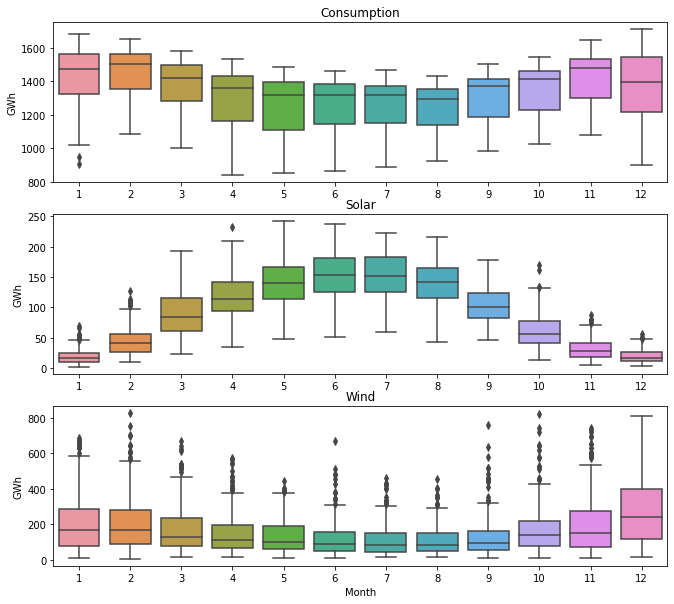

In [27]:
fig, axes = plt.subplots(3, 1, figsize=(11, 10))

for name, ax in zip(['Consumption','Solar','Wind'],axes):
    
    sns.boxplot(data=opsd_daily,x='Month',y=name,ax=ax)
    
    ax.set_ylabel('GWh')
    ax.set_title(name)
    
    if ax != axes[-1]:
        ax.set_xlabel('')

In [28]:
sns.boxplot(data=opsd_daily, x='Weekday Name', y='Consumption');

ValueError: Could not interpret input 'Weekday Name'

## Frequencies

In [29]:
pd.date_range('1998-03-10','15-03-1998',freq='D')

DatetimeIndex(['1998-03-10', '1998-03-11', '1998-03-12', '1998-03-13',
               '1998-03-14', '1998-03-15'],
              dtype='datetime64[ns]', freq='D')

In [30]:
pd.date_range('2004-09-20',periods=8, freq='H')

DatetimeIndex(['2004-09-20 00:00:00', '2004-09-20 01:00:00',
               '2004-09-20 02:00:00', '2004-09-20 03:00:00',
               '2004-09-20 04:00:00', '2004-09-20 05:00:00',
               '2004-09-20 06:00:00', '2004-09-20 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [31]:
opsd_daily.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

In [32]:
opsd_daily.index.min(), opsd_daily.index.max()

(Timestamp('2006-01-01 00:00:00'), Timestamp('2017-12-31 00:00:00'))

In [33]:
times_sample = pd.to_datetime(['2013-02-03','2013-02-06','2013-02-08'])

In [34]:
consum_sample = opsd_daily.loc[times_sample,['Consumption']].copy()
consum_sample

,Consumption
2013-02-03,1109.639
2013-02-06,1451.449
2013-02-08,1433.098


In [35]:
data_columns = ['Consumption','Wind','Solar','Wind+Solar']

opsd_weekly_mean = opsd_daily[data_columns].resample('W').mean()
opsd_weekly_mean.tail(10)


,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2017-10-29,1419.077067,485.735571,44.344857,530.080429
2017-11-05,1326.164499,300.840286,49.796857,350.637143
2017-11-12,1472.113604,273.502143,21.129000,294.631143
2017-11-19,1491.885550,329.920000,28.595143,358.515143
2017-11-26,1488.566089,452.703286,25.847857,478.551143
2017-12-03,1536.236314,284.334286,18.320857,302.655143
2017-12-10,1554.824946,636.514714,16.440286,652.955000
2017-12-17,1543.856889,442.531857,18.143714,460.675571
2017-12-24,1440.342401,339.018429,9.895143,348.913571


In [36]:
print(opsd_daily.shape[0])
print(opsd_weekly_mean.shape[0])

4383
627


<Figure size 1152x360 with 0 Axes>

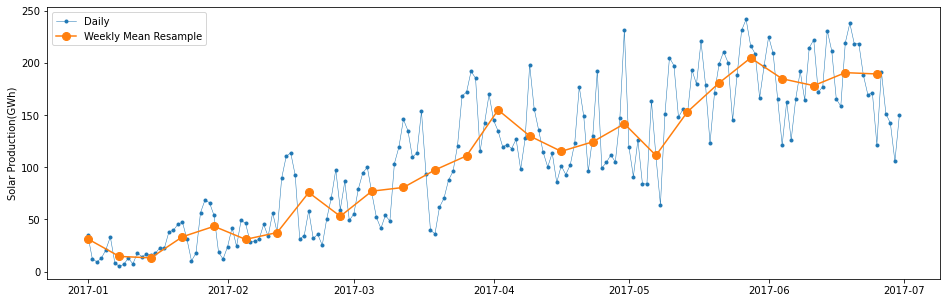

In [37]:
start, end = '2017-01','2017-06'

plt.figure(figsize=(16, 5))

fig, ax = plt.subplots(figsize=(16, 5))

ax.plot(opsd_daily.loc[start:end,'Solar'],
       marker='.',linestyle='-',linewidth=0.5,label='Daily')

ax.plot(opsd_weekly_mean.loc[start:end,'Solar'],
       marker='o',markersize=8,linestyle='-', label='Weekly Mean Resample')

ax.set_ylabel('Solar Production(GWh)')
ax.legend();

In [38]:
opsd_monthly = opsd_daily[data_columns].resample('M').sum()
opsd_monthly.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-31,45304.704,0.0,0.0,0.0
2006-02-28,41078.993,0.0,0.0,0.0
2006-03-31,43978.124,0.0,0.0,0.0
2006-04-30,38251.767,0.0,0.0,0.0
2006-05-31,38858.143,0.0,0.0,0.0


In [39]:
opsd_7d = opsd_daily[data_columns].rolling(7, center=True).mean()
opsd_7d.head(10)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,NaN,NaN,NaN,NaN
2006-01-02,NaN,NaN,NaN,NaN
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,1361.471429,NaN,NaN,NaN
2006-01-05,1381.300143,NaN,NaN,NaN
2006-01-06,1402.557571,NaN,NaN,NaN
2006-01-07,1421.754429,NaN,NaN,NaN
2006-01-08,1438.891429,NaN,NaN,NaN
2006-01-09,1449.769857,NaN,NaN,NaN


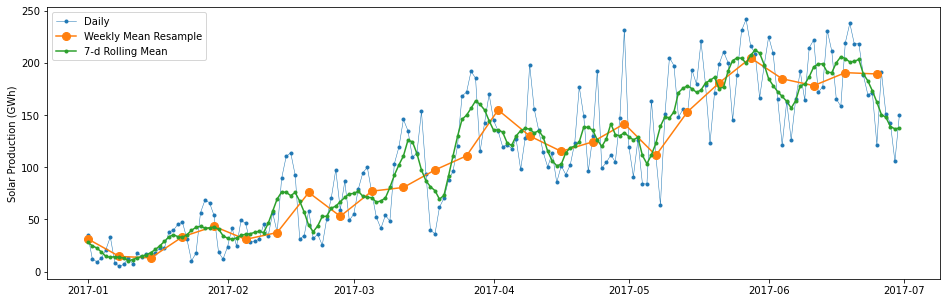

In [40]:
start, end = '2017-01','2017-06'

fig, ax = plt.subplots(figsize=(16, 5))

ax.plot(opsd_daily.loc[start:end, 'Solar'],
       marker='.',linestyle='-',linewidth=0.5, label='Daily')

ax.plot(opsd_weekly_mean.loc[start:end, 'Solar'],
       marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')

ax.plot(opsd_7d.loc[start:end, 'Solar'],
       marker='.', linestyle='-', label = '7-d Rolling Mean')

ax.set_ylabel('Solar Production (GWh)')
ax.legend();

In [41]:
opsd_365d = opsd_daily[data_columns].rolling(window=30, center=True, min_periods=30).mean()

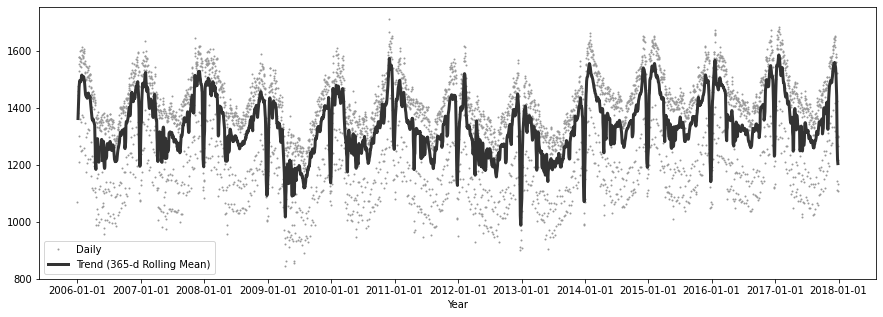

In [43]:
fig, ax = plt.subplots()

ax.plot(opsd_daily['Consumption'],marker='.',markersize=2, 
        color='0.6',linestyle='None',label='Daily')

ax.plot(opsd_7d['Consumption'],color='0.2',linewidth=3,
       label='Trend (365-d Rolling Mean)')

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_label('')

In [ ]:
fig, ax = plt.subplots()

for nm in ['Wind','Solar','Wind+Solar']:
    ax.plot(opsd_365d[nm],label=nm)
    
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.set_ylim(0, 400)
ax.leend()
ax.set_ylabel('Production(GWh)')
ax.set_title('Trends in Electricity Production(365-d Rolling Means)')
